# A GAN to generate handwriting digits

The program is modified from
https://medium.com/datadriveninvestor/generative-adversarial-network-gan-using-keras-ce1c05cfdfd3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow.keras
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.datasets import mnist
from tqdm import tqdm
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam

### Read MNIST Data

In [2]:
def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = (x_train.astype(np.float32) - 127.5)/127.5
    
    # convert shape of x_train from (60000, 28, 28) to (60000, 784) 
    # 784 columns per row
    x_train = x_train.reshape(60000, 784)
    return (x_train, y_train, x_test, y_test)

In [3]:
(X_train, y_train,X_test, y_test)=load_data()
print(X_train.shape)

(60000, 784)


In [4]:
def adam_optimizer():
    return Adam(lr=0.0002, beta_1=0.5)

### Define Generator

In [5]:
def create_generator():
    generator=Sequential()
    generator.add(Dense(units=256,input_dim=100))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=512))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=1024))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=784, activation='tanh'))
    
    generator.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return generator

In [6]:
g=create_generator()
g.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               25856     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 784)               8

### Define Discriminator

In [7]:
def create_discriminator():
    discriminator=Sequential()
    discriminator.add(Dense(units=1024,input_dim=784))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    
    discriminator.add(Dense(units=512))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    discriminator.add(Dense(units=256))
    discriminator.add(LeakyReLU(0.2))
    
    discriminator.add(Dense(units=1, activation='sigmoid'))
    
    discriminator.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return discriminator

In [8]:
d =create_discriminator()
d.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1024)              803840    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)              

### Define GAN

In [9]:
def create_gan(discriminator, generator):
    discriminator.trainable=False
    gan_input = Input(shape=(100,))
    x = generator(gan_input)
    gan_output= discriminator(x)
    gan= Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    return gan

In [10]:
gan = create_gan(d,g)
gan.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential (Sequential)      (None, 784)               1486352   
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 1460225   
Total params: 2,946,577
Trainable params: 1,486,352
Non-trainable params: 1,460,225
_________________________________________________________________


In [11]:
def plot_generated_images(epoch, generator, examples=100, dim=(10,10), figsize=(10,10)):
    noise= np.random.normal(loc=0, scale=1, size=[examples, 100])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(100,28,28)
    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest')
        plt.axis('off')
    plt.tight_layout()
#     plt.savefig('gan_generated_image %d.png' %epoch)
    plt.show()

In [12]:
batch_size = 512

In [13]:
#Loading the data
(X_train, y_train, X_test, y_test) = load_data()
batch_count = X_train.shape[0] / batch_size

### Build the GAN

In [14]:
# Creating GAN
generator= create_generator()
discriminator= create_discriminator()
gan = create_gan(discriminator, generator)

### Training

  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 1


100%|████████████████████████████████████████████████████████████████████████████████| 512/512 [03:18<00:00,  2.58it/s]


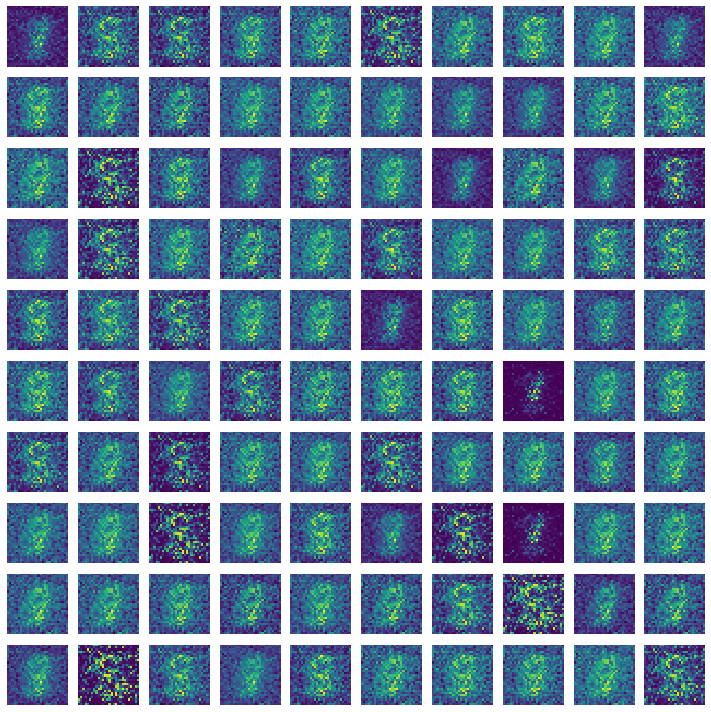

  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 2


100%|████████████████████████████████████████████████████████████████████████████████| 512/512 [03:19<00:00,  2.57it/s]


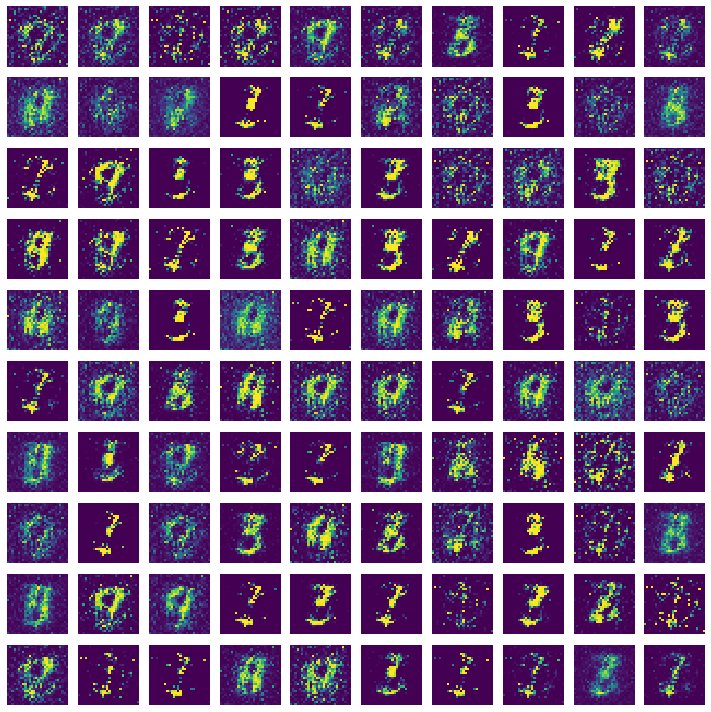

  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 3


  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 4


100%|████████████████████████████████████████████████████████████████████████████████| 512/512 [03:15<00:00,  2.61it/s]


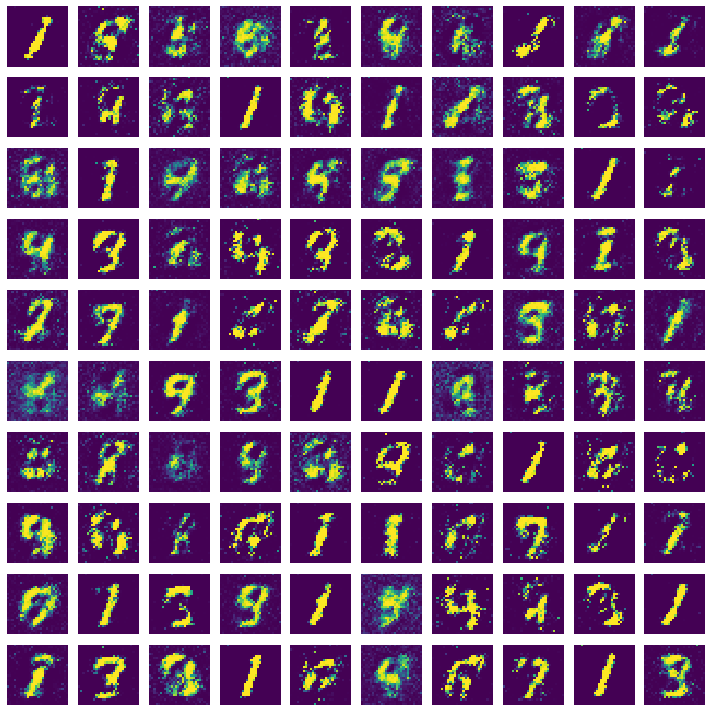

  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 5


  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 6


100%|████████████████████████████████████████████████████████████████████████████████| 512/512 [03:26<00:00,  2.48it/s]


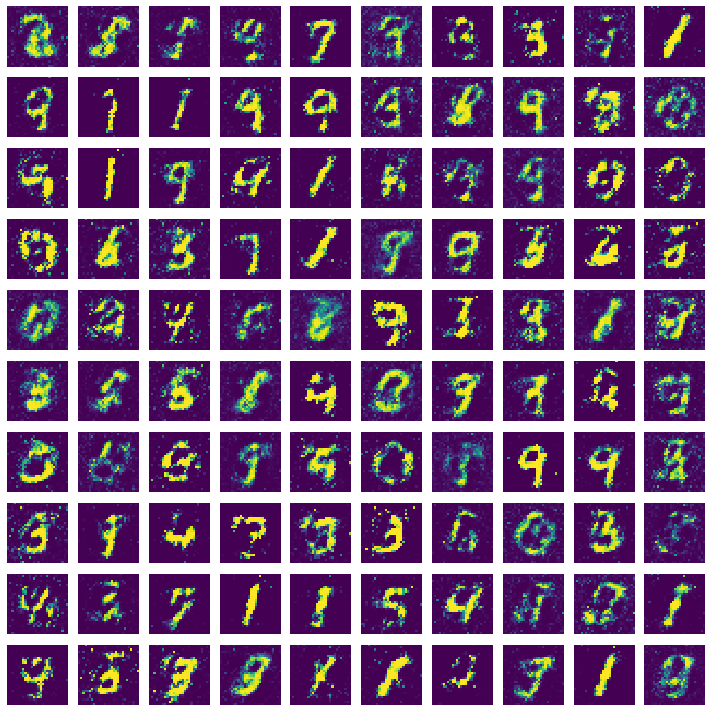

  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 7


  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 8


100%|████████████████████████████████████████████████████████████████████████████████| 512/512 [03:35<00:00,  2.38it/s]


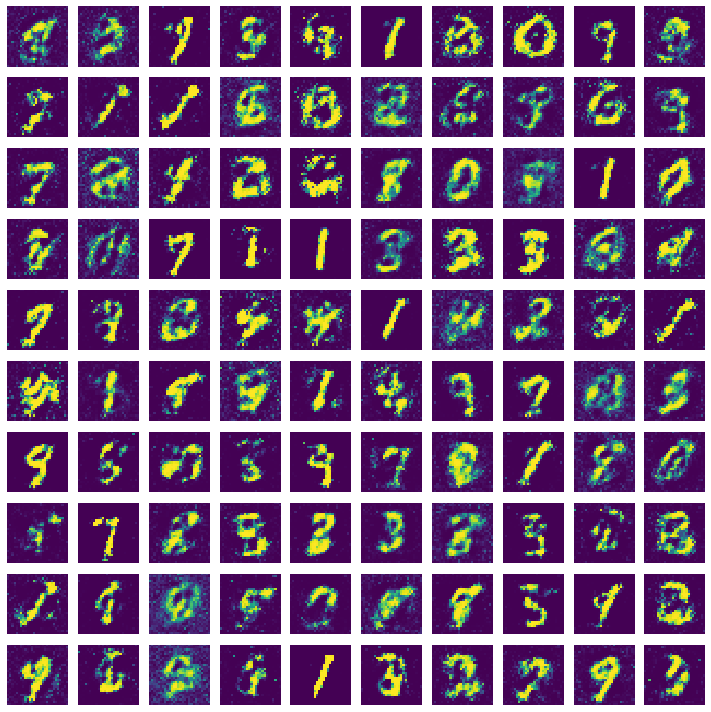

  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 9


  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 10


100%|████████████████████████████████████████████████████████████████████████████████| 512/512 [05:01<00:00,  1.70it/s]


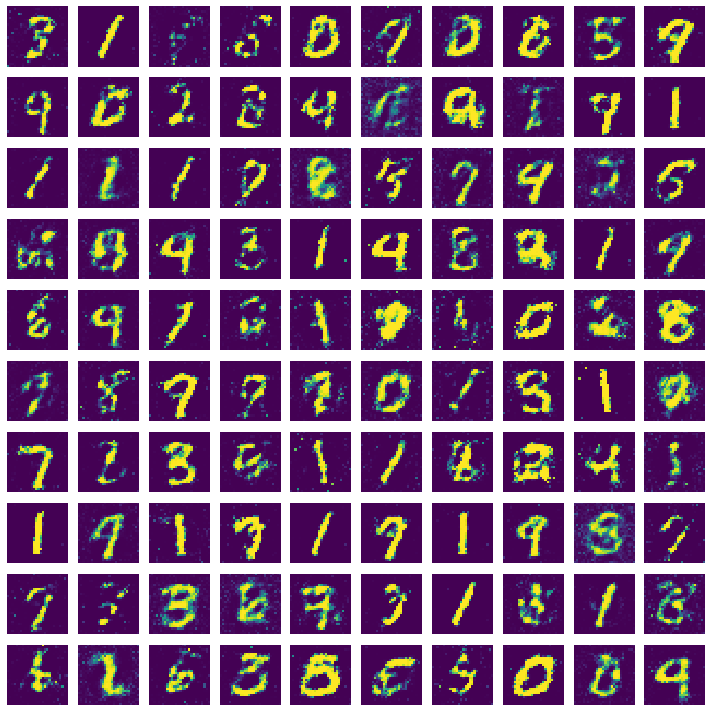

  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 11


  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 12


100%|████████████████████████████████████████████████████████████████████████████████| 512/512 [05:44<00:00,  1.49it/s]


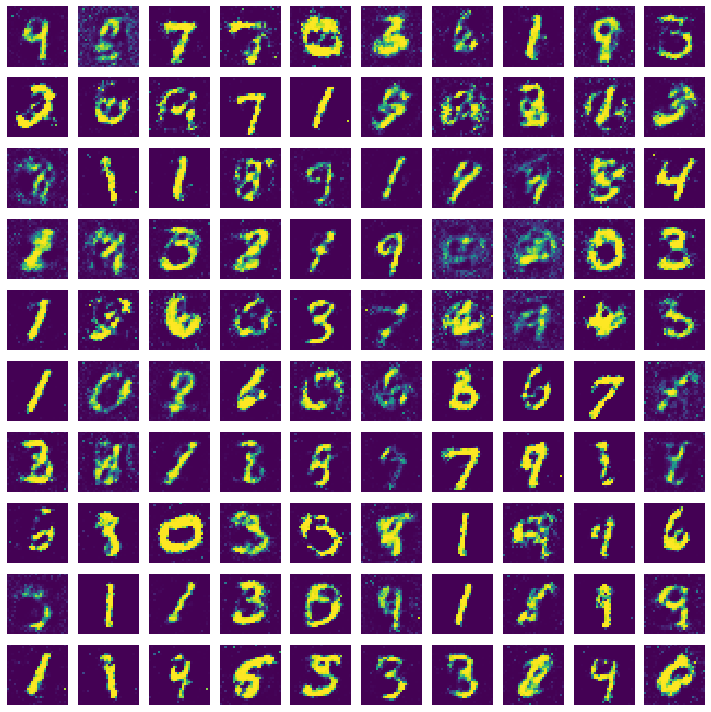

  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 13


  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 14


100%|████████████████████████████████████████████████████████████████████████████████| 512/512 [06:15<00:00,  1.36it/s]


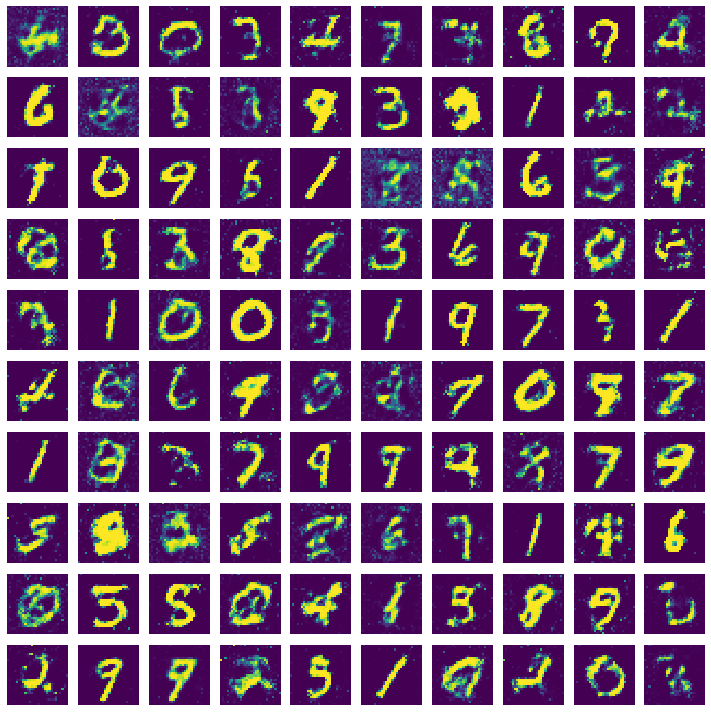

  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 15


  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 16


100%|████████████████████████████████████████████████████████████████████████████████| 512/512 [07:00<00:00,  1.22it/s]


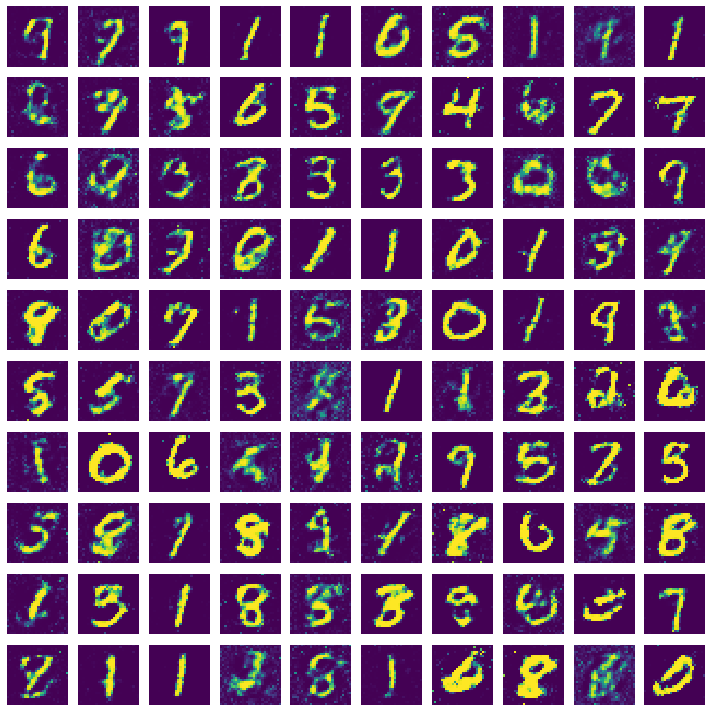

  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 17


  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 18


100%|████████████████████████████████████████████████████████████████████████████████| 512/512 [07:22<00:00,  1.16it/s]


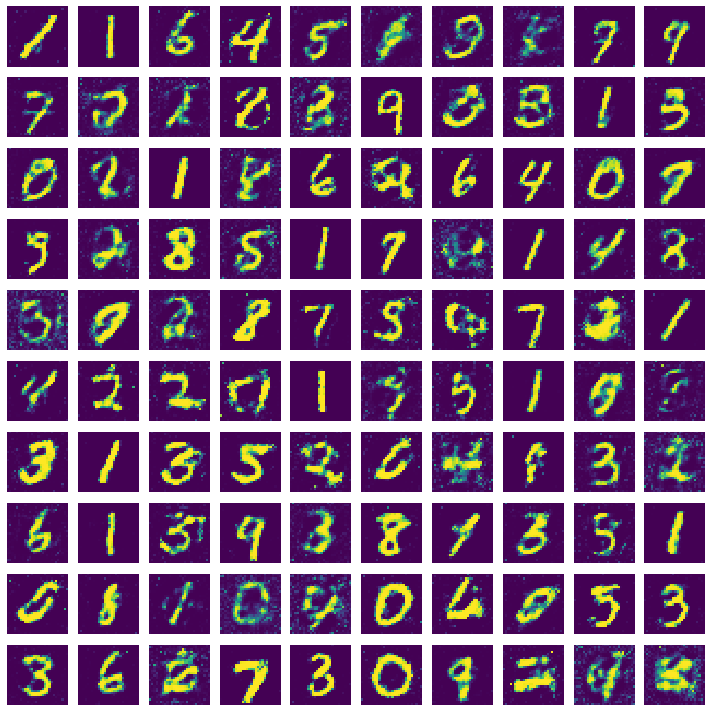

  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 19


  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 20


100%|████████████████████████████████████████████████████████████████████████████████| 512/512 [05:14<00:00,  1.63it/s]


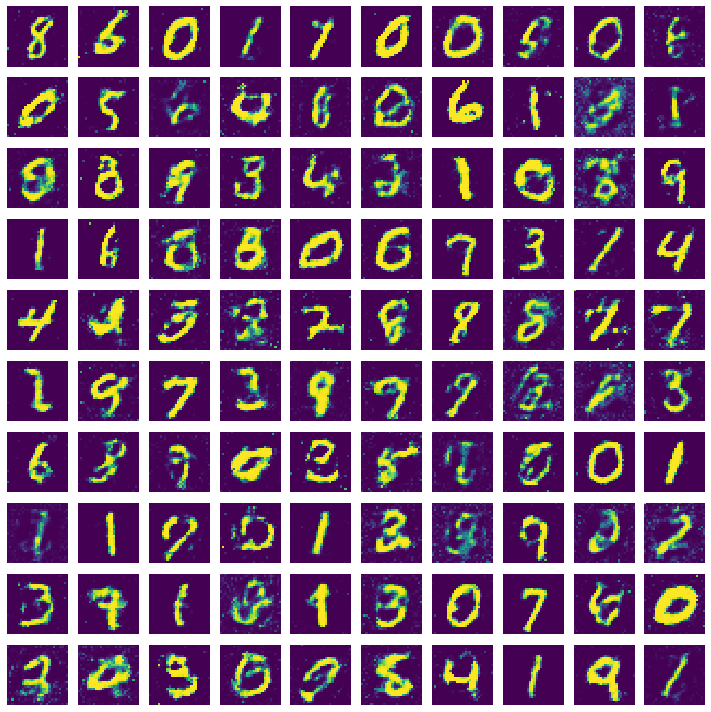

  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 21


  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 22


100%|████████████████████████████████████████████████████████████████████████████████| 512/512 [06:12<00:00,  1.37it/s]


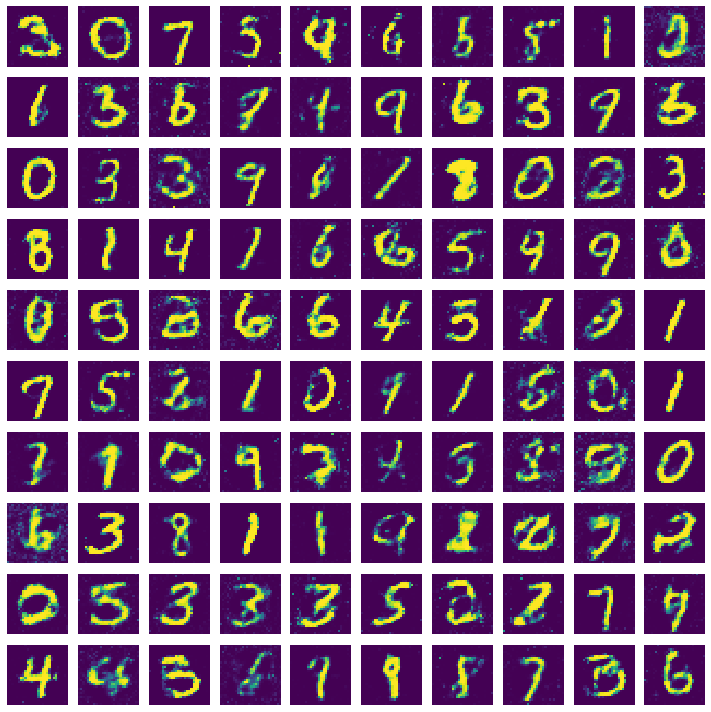

  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 23


  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 24


100%|████████████████████████████████████████████████████████████████████████████████| 512/512 [06:58<00:00,  1.22it/s]


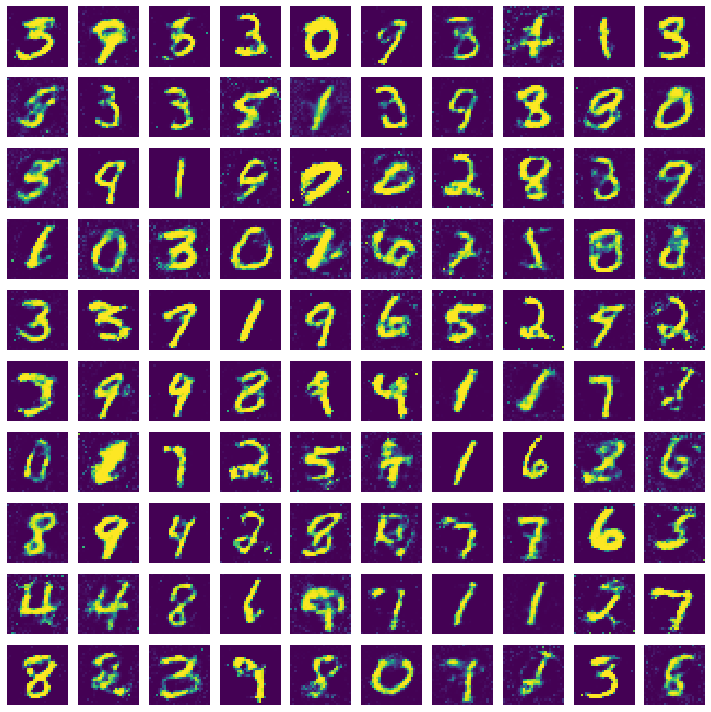

  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 25


  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 26


100%|████████████████████████████████████████████████████████████████████████████████| 512/512 [07:35<00:00,  1.12it/s]


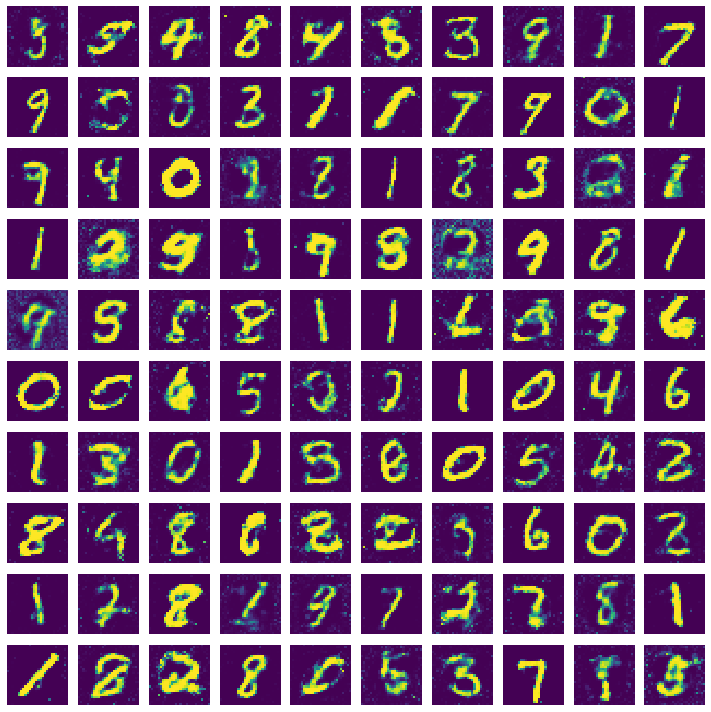

  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 27


  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 28


100%|████████████████████████████████████████████████████████████████████████████████| 512/512 [08:34<00:00,  1.01s/it]


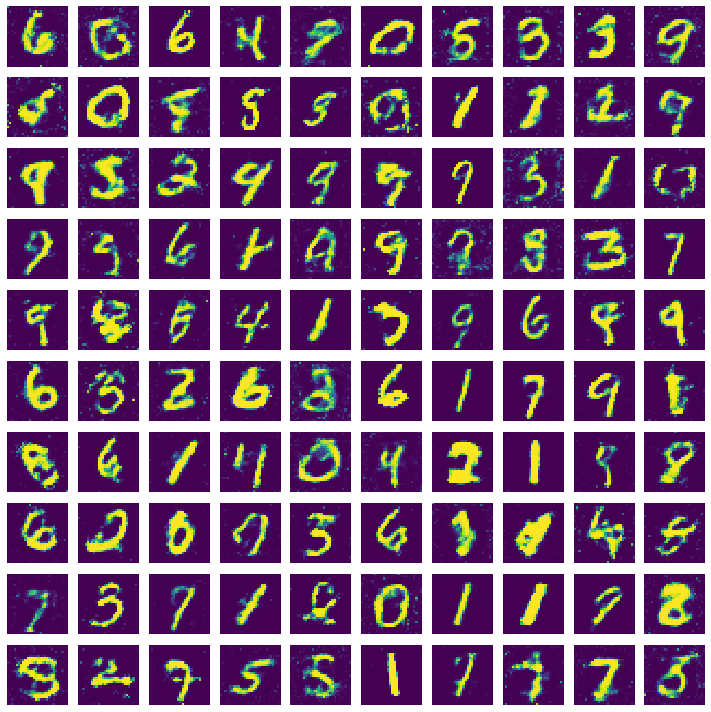

  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 29


  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 30


100%|████████████████████████████████████████████████████████████████████████████████| 512/512 [09:07<00:00,  1.07s/it]


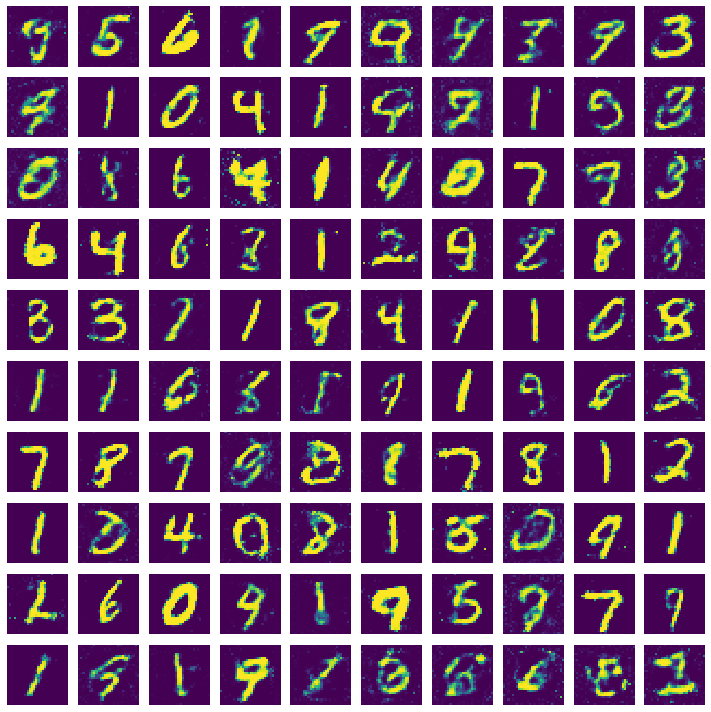

  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 31


  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 32


100%|████████████████████████████████████████████████████████████████████████████████| 512/512 [10:30<00:00,  1.23s/it]


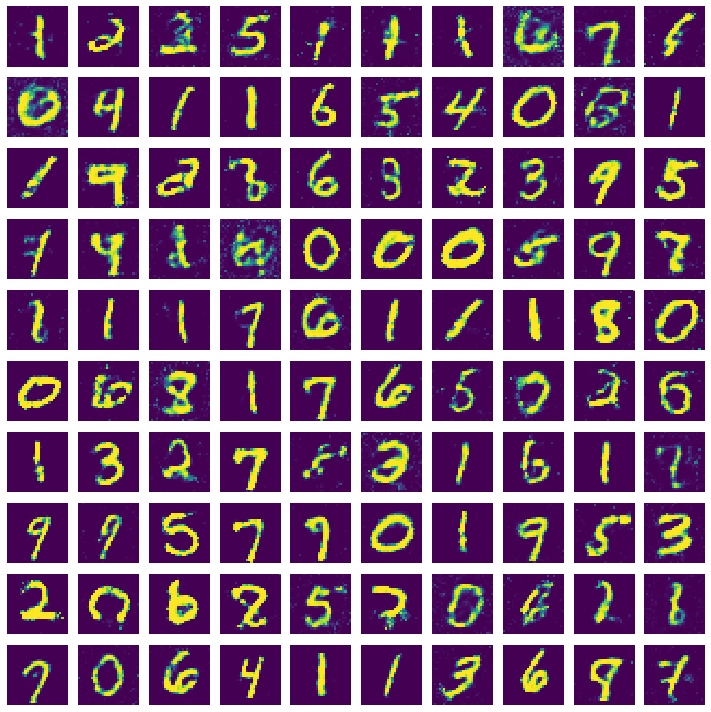

  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 33


  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 34


100%|████████████████████████████████████████████████████████████████████████████████| 512/512 [11:58<00:00,  1.40s/it]


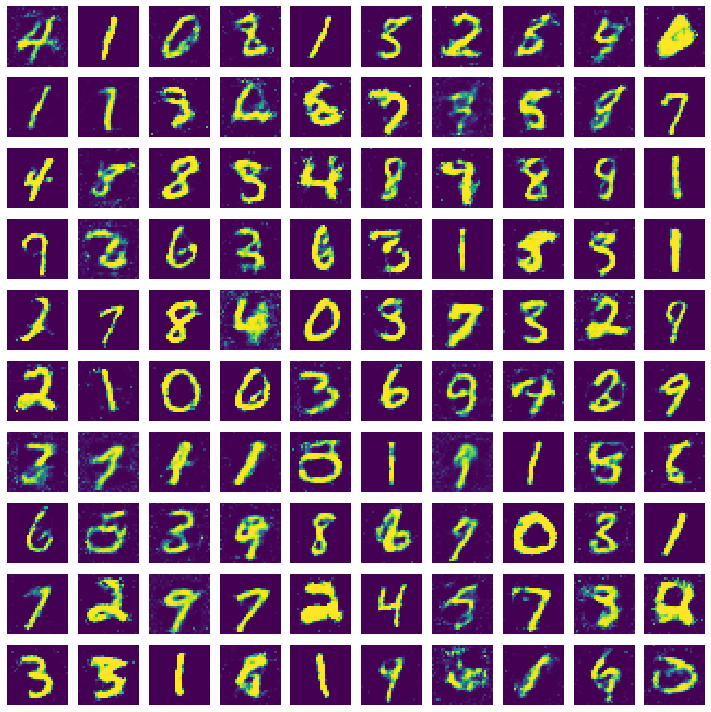

  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 35


  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 36


100%|████████████████████████████████████████████████████████████████████████████████| 512/512 [12:56<00:00,  1.52s/it]


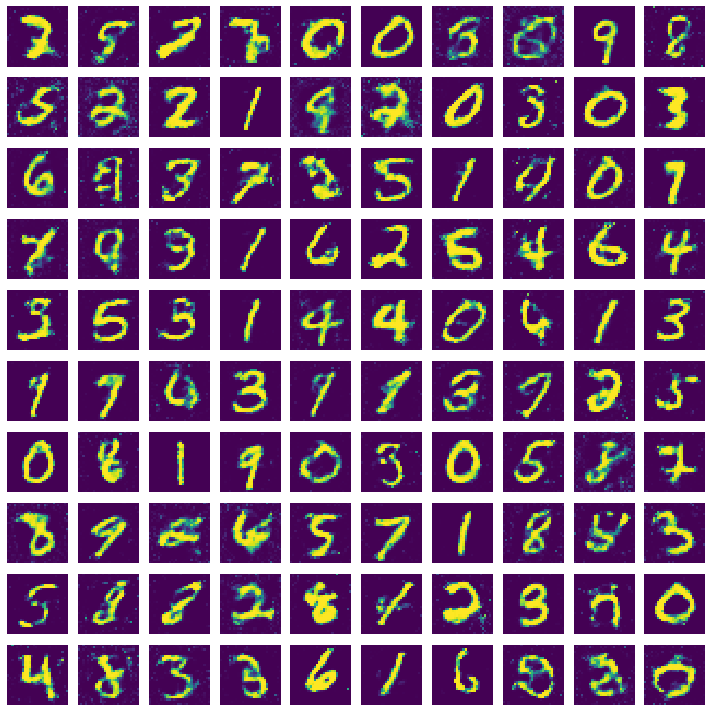

  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 37


  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 38


100%|████████████████████████████████████████████████████████████████████████████████| 512/512 [14:24<00:00,  1.69s/it]


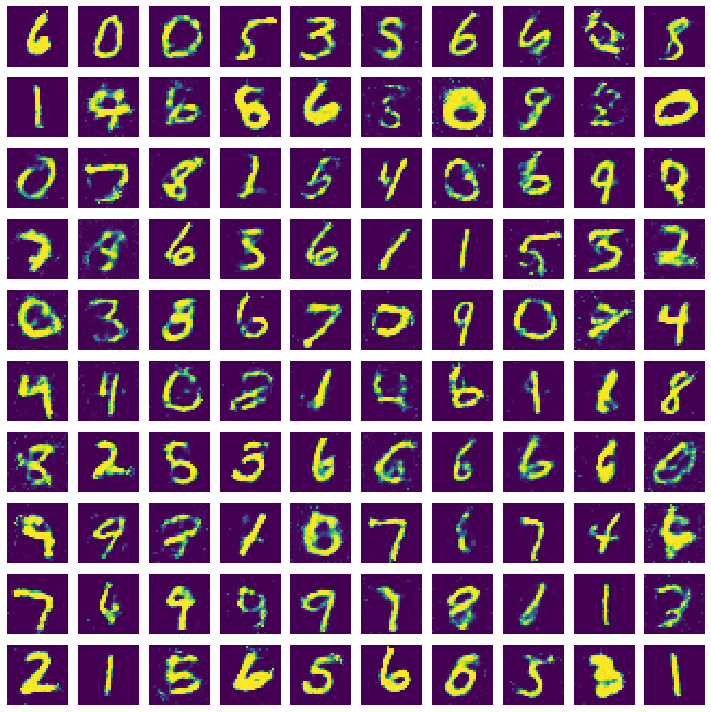

  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 39


  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 40


100%|████████████████████████████████████████████████████████████████████████████████| 512/512 [16:04<00:00,  1.88s/it]


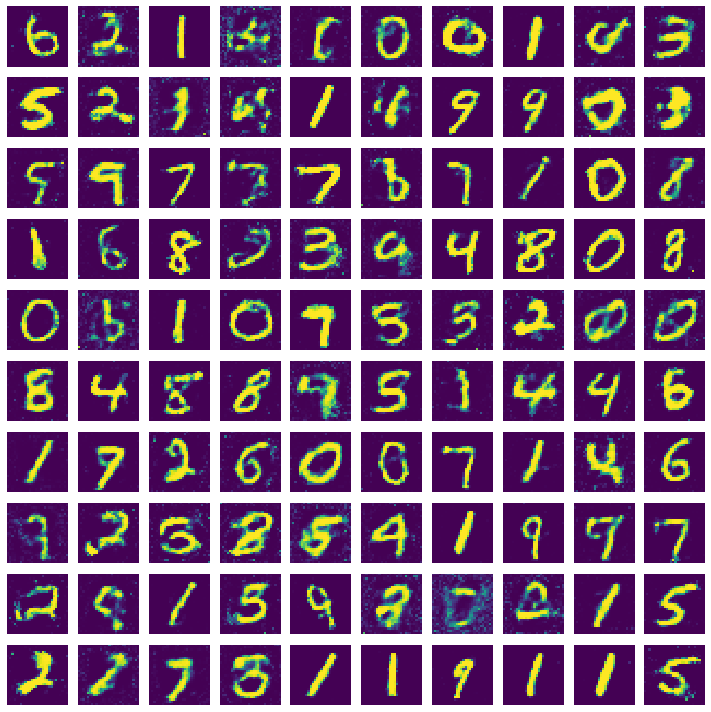

  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 41


  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 42


100%|████████████████████████████████████████████████████████████████████████████████| 512/512 [17:45<00:00,  2.08s/it]


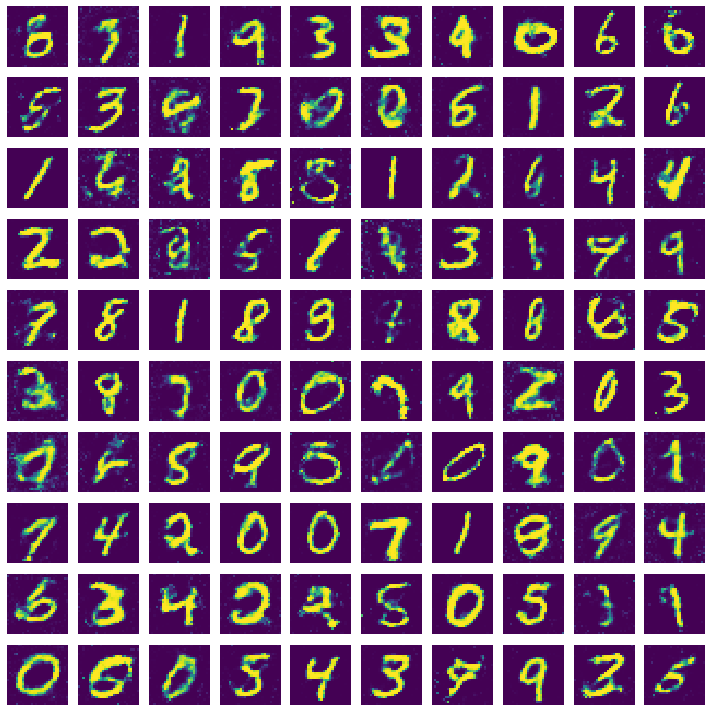

  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 43


  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 44


100%|████████████████████████████████████████████████████████████████████████████████| 512/512 [18:39<00:00,  2.19s/it]


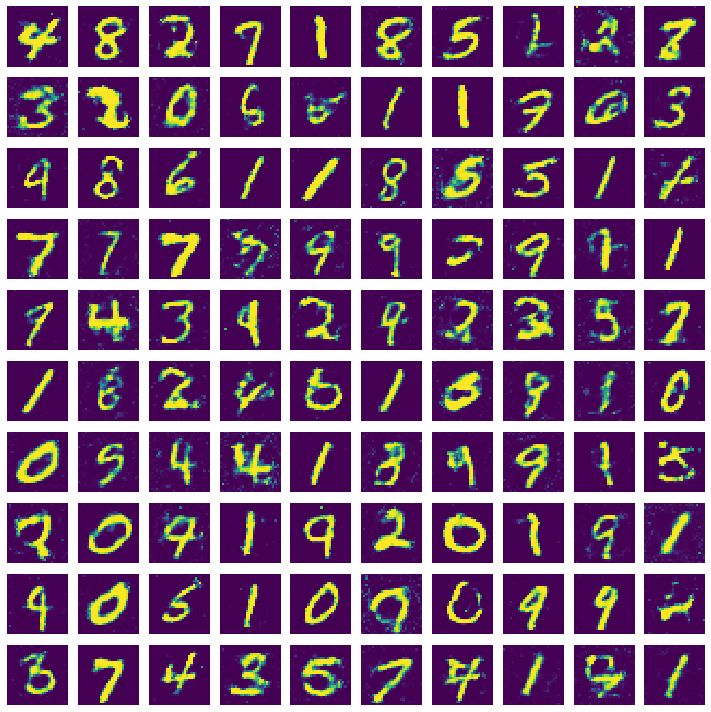

  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 45


  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 46


100%|████████████████████████████████████████████████████████████████████████████████| 512/512 [20:32<00:00,  2.41s/it]


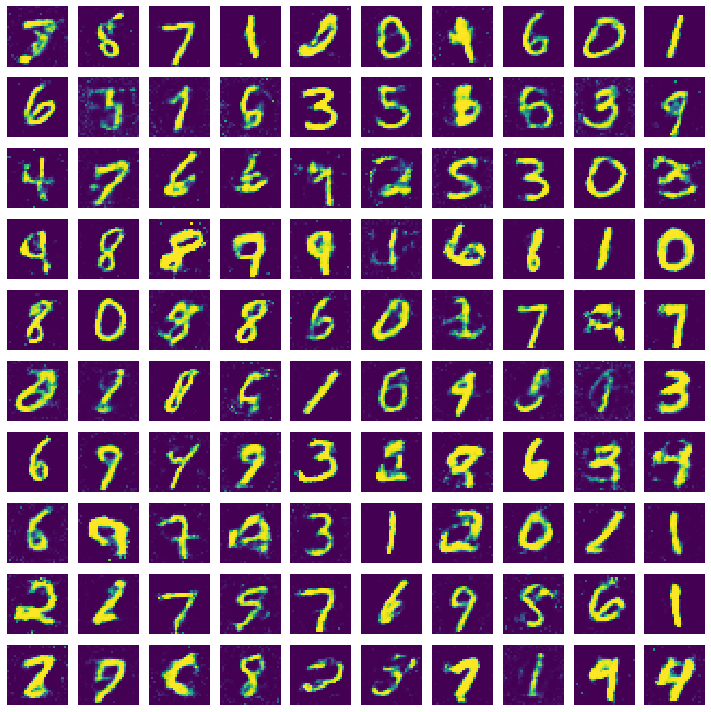

  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 47


  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 48


100%|████████████████████████████████████████████████████████████████████████████████| 512/512 [22:56<00:00,  2.69s/it]


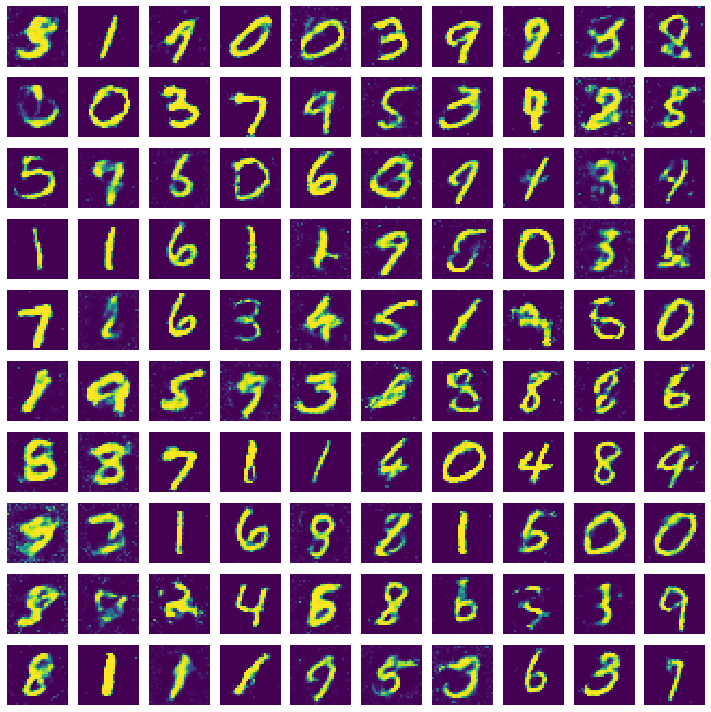

  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 49


  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 50


100%|████████████████████████████████████████████████████████████████████████████████| 512/512 [24:49<00:00,  2.91s/it]


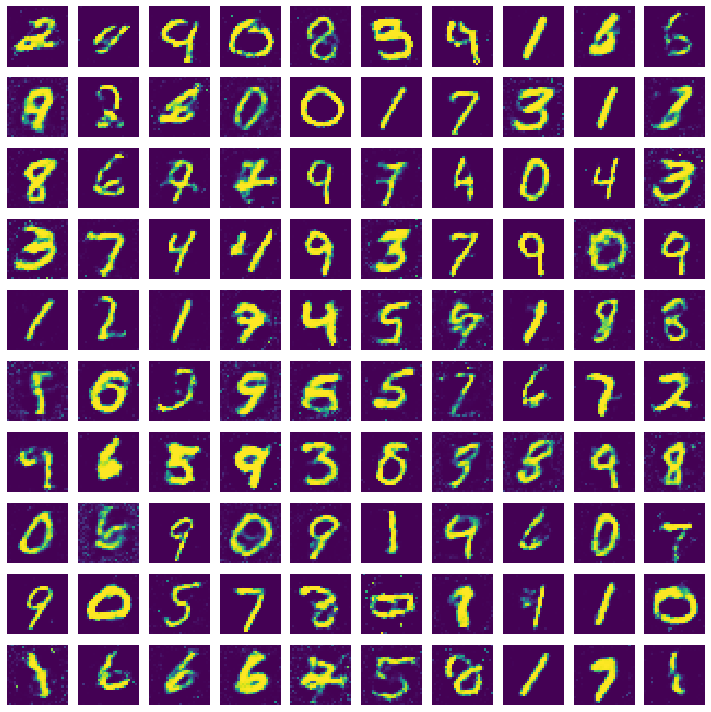

  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 51


  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 52


100%|████████████████████████████████████████████████████████████████████████████████| 512/512 [28:58<00:00,  3.40s/it]


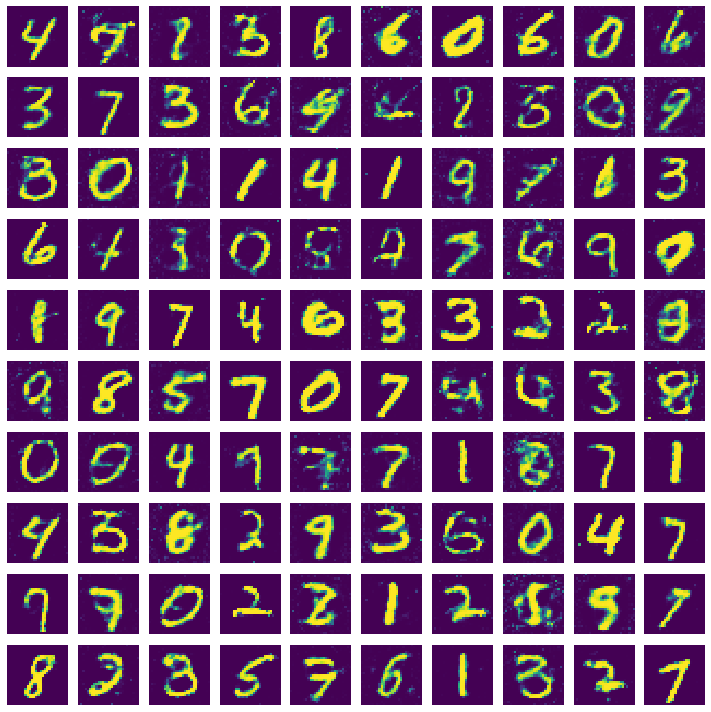

  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 53


  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 54


100%|██████████████████████████████████████████████████████████████████████████████| 512/512 [9:32:23<00:00, 67.08s/it]


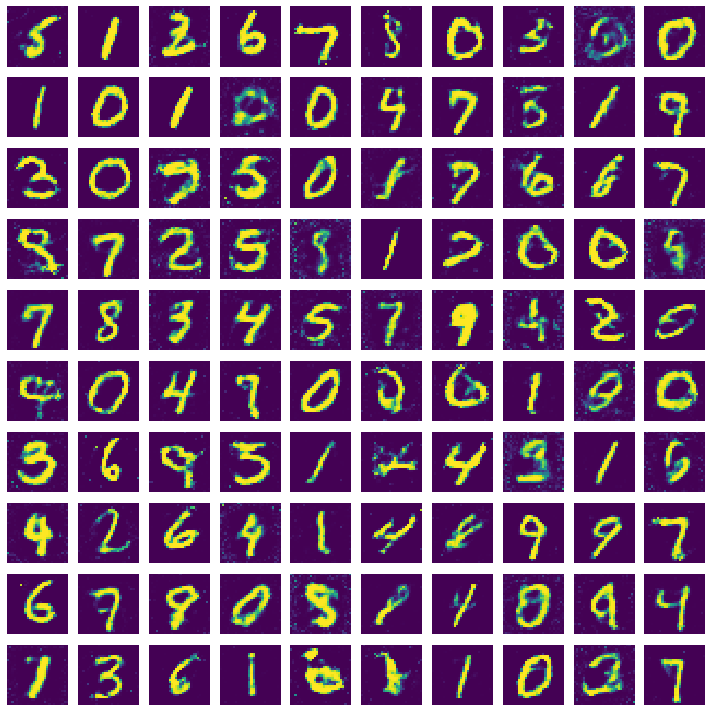

  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 55


  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 56


100%|████████████████████████████████████████████████████████████████████████████████| 512/512 [30:23<00:00,  3.56s/it]


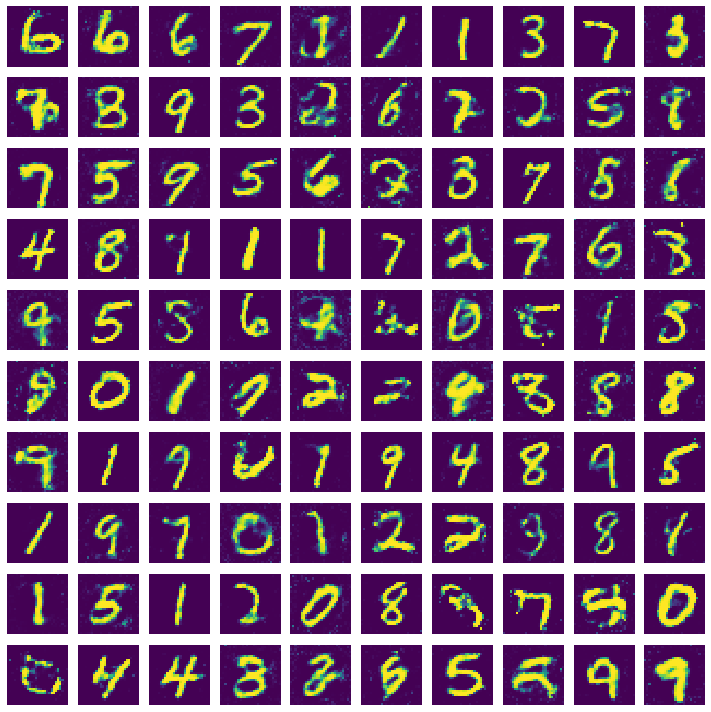

  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 57


  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 58


100%|████████████████████████████████████████████████████████████████████████████████| 512/512 [30:22<00:00,  3.56s/it]


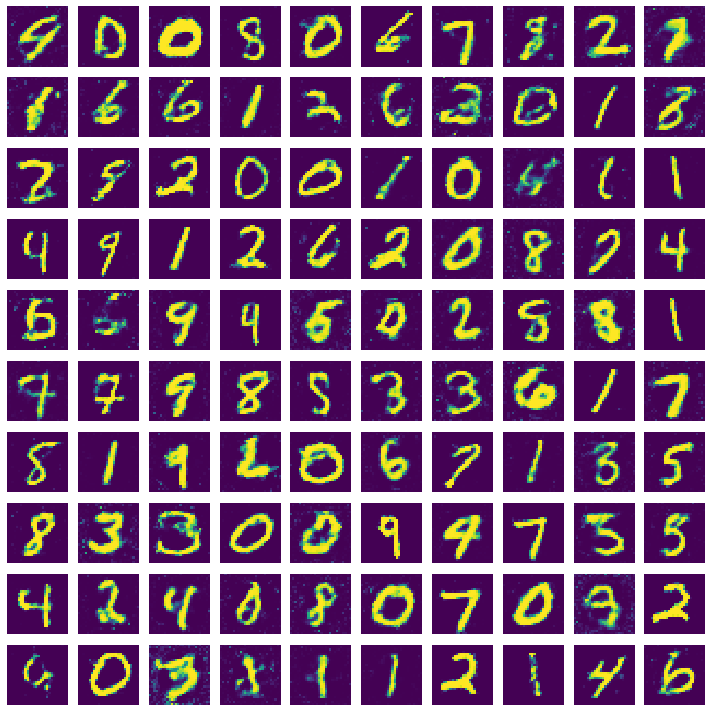

  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 59


  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 60


100%|████████████████████████████████████████████████████████████████████████████████| 512/512 [33:35<00:00,  3.94s/it]


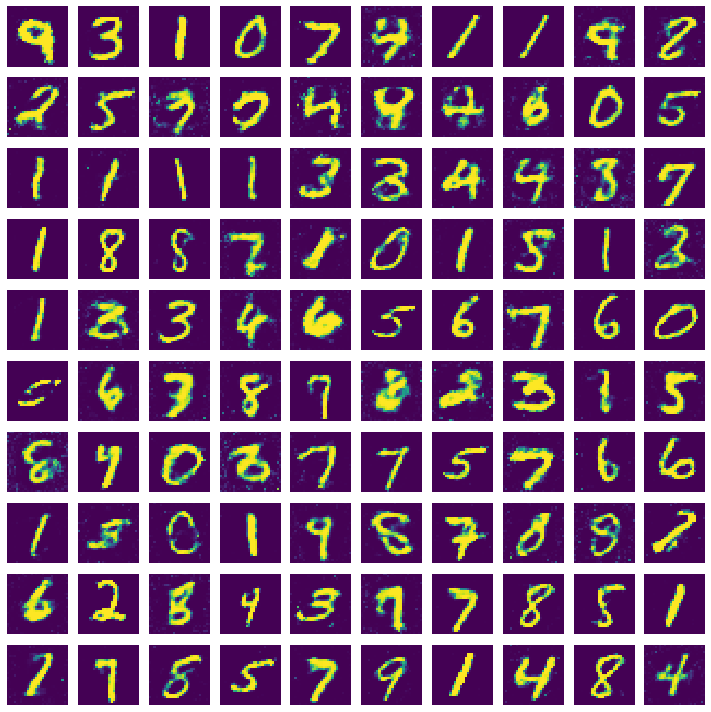

  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 61


  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 62


100%|████████████████████████████████████████████████████████████████████████████████| 512/512 [36:58<00:00,  4.33s/it]


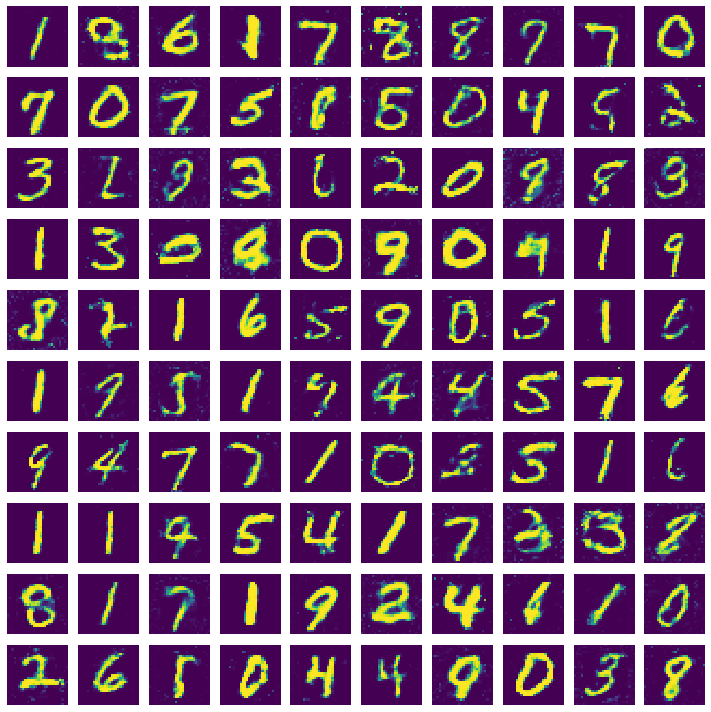

  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 63


  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 64


100%|████████████████████████████████████████████████████████████████████████████████| 512/512 [43:56<00:00,  5.15s/it]


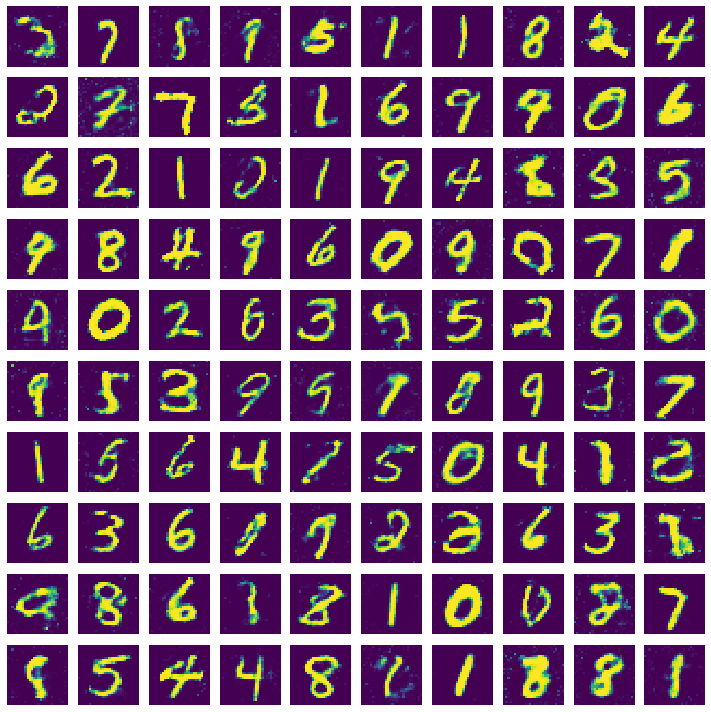

  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 65


  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 66


100%|████████████████████████████████████████████████████████████████████████████████| 512/512 [36:59<00:00,  4.34s/it]


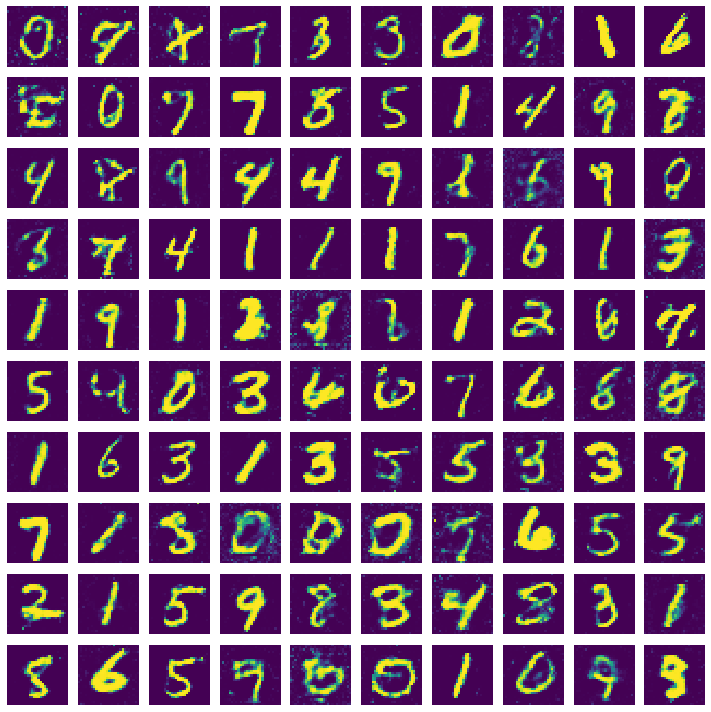

  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 67


  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 68


100%|████████████████████████████████████████████████████████████████████████████████| 512/512 [39:23<00:00,  4.62s/it]


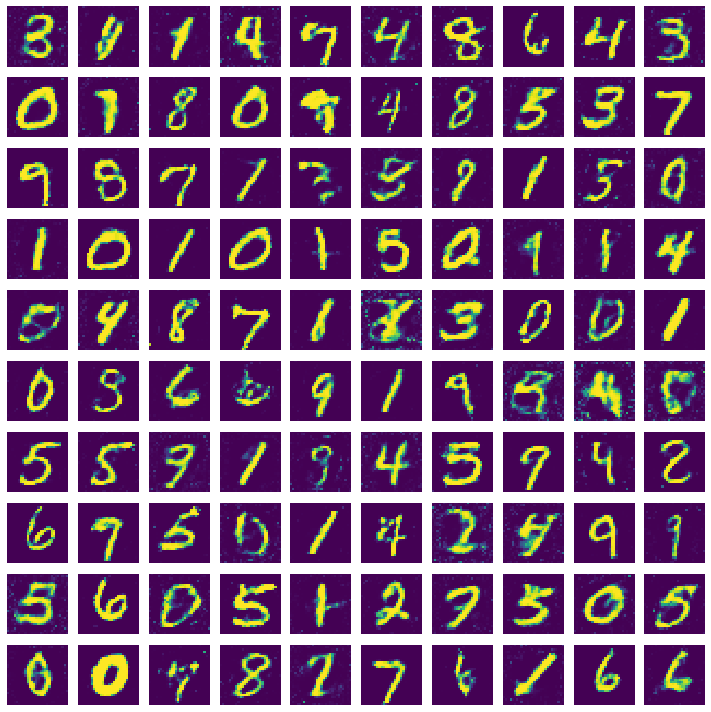

  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 69


  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 70


100%|████████████████████████████████████████████████████████████████████████████████| 512/512 [41:05<00:00,  4.82s/it]


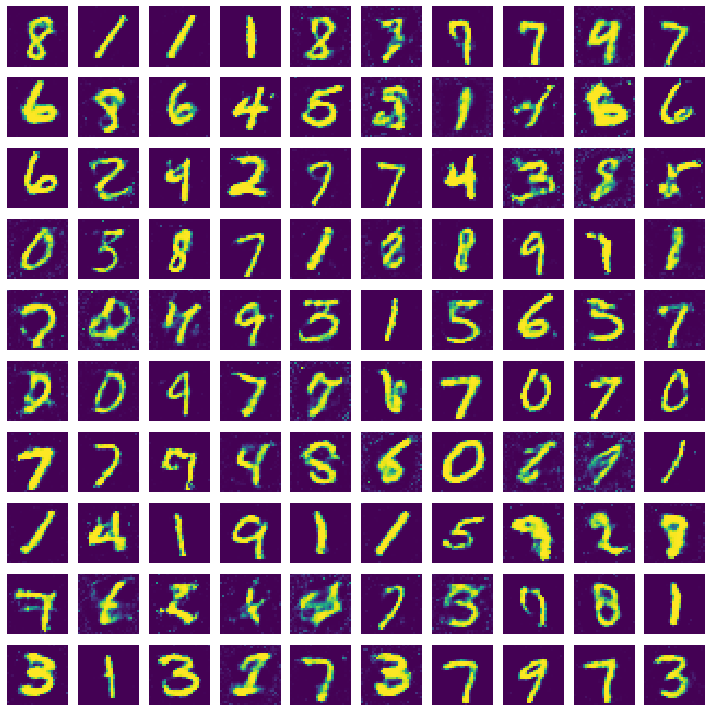

  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 71


  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

Epoch 72


 48%|██████████████████████████████████████▎                                         | 245/512 [21:06<23:11,  5.21s/it]

KeyboardInterrupt: 

In [15]:
for e in range(1, 400):
    print("Epoch %d" %e)
    for _ in tqdm(range(batch_size)):
    #generate  random noise as an input  to  initialize the  generator
        noise= np.random.normal(0,1, [batch_size, 100])

        # Generate fake MNIST images from noised input
        generated_images = generator.predict(noise)

        # Get a random set of  real images
        image_batch =X_train[np.random.randint(low=0,high=X_train.shape[0],size=batch_size)]

        #Construct different batches of  real and fake data 
        X= np.concatenate([image_batch, generated_images])

        # Labels for generated and real data
        y_dis=np.zeros(2*batch_size)
        y_dis[:batch_size]=0.9

        #Pre train discriminator on  fake and real data  before starting the gan. 
        discriminator.trainable=True
        discriminator.train_on_batch(X, y_dis)

        #Tricking the noised input of the Generator as real data
        noise= np.random.normal(0,1, [batch_size, 100])
        y_gen = np.ones(batch_size)

        # During the training of gan, 
        # the weights of discriminator should be fixed. 
        #We can enforce that by setting the trainable flag
        discriminator.trainable=False

        #training  the GAN by alternating the training of the Discriminator 
        #and training the chained GAN model with Discriminator’s weights freezed.
        gan.train_on_batch(noise, y_gen)

    if e == 1 or e % 2 == 0:
        plot_generated_images(e, generator)